# Neural network Classification with PyTorch

Book Link : https://www.learnpytorch.io/02_pytorch_classification/

# Make classification data and get it ready

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [ ]:
# make dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1" : X[:, 0],
                        "X2" : X[:, 1],
                        "label" : y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
circles.label.value_counts()

,count
label,
1,500
0,500


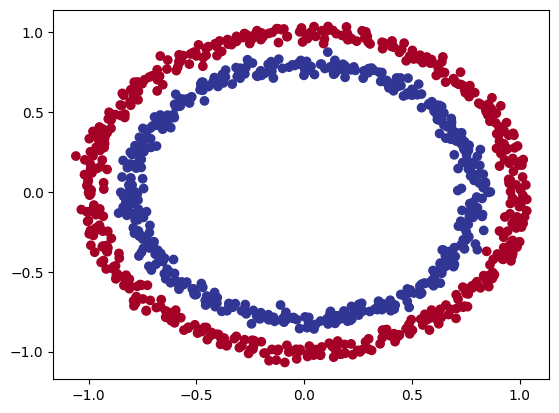

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

#### Note - the data we're working with is often reffered to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice fundamentals

## Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# view the first example of features and labels
X_sample = X[0]
y_sample = y[0]
X_sample, y_sample, X_sample.shape, y_sample.shape

(array([0.75424625, 0.23148074]), np.int64(1), (2,), ())

## turn data to tensors

In [ ]:
import torch
torch.__version__

'2.6.0+cu124'

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# Split data into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
n_samples

1000

## Building model

lets build a model to classify our blue amd red dots

In [ ]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# construct a model
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # create 2 nn.Linear layers capable of handling the shape of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  # forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

In [ ]:
model_0 = CircleModelV0()
model_0, model_0.state_dict()

(CircleModelV0(
   (layer_1): Linear(in_features=2, out_features=5, bias=True)
   (layer_2): Linear(in_features=5, out_features=1, bias=True)
 ),
 OrderedDict([('layer_1.weight',
               tensor([[-0.0908,  0.6203],
                       [-0.6625,  0.6255],
                       [-0.4206, -0.5201],
                       [-0.4654,  0.3711],
                       [-0.6473, -0.5332]])),
              ('layer_1.bias',
               tensor([-0.2585,  0.2371,  0.2054,  0.4515,  0.2151])),
              ('layer_2.weight',
               tensor([[-0.1208, -0.1870,  0.1496,  0.2235, -0.1372]])),
              ('layer_2.bias', tensor([-0.1799]))]))

In [ ]:
# Let's replicate the model above using nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.4867, -0.4359],
                      [-0.4065,  0.5324],
                      [ 0.0558,  0.6349],
                      [ 0.3313, -0.3729],
                      [ 0.5281,  0.4394]])),
             ('0.bias', tensor([ 0.1479, -0.2019,  0.0454, -0.5144, -0.2427])),
             ('1.weight',
              tensor([[-0.1252,  0.1714, -0.1876, -0.2033,  0.2367]])),
             ('1.bias', tensor([-0.1551]))])

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

In [ ]:
# visualize
print(f"First 10 predictions: {torch.round(untrained_preds[:10])}")
print(f"First 10 actual labels: {y_test[:10]}")

First 10 predictions: tensor([[-0.],
        [0.],
        [-0.],
        [0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [0.]])
First 10 actual labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## Set up loss functionn and optimizer

  Which loss function and optimizer should you use?

  Again... this is problem specific

  For example for regression you might want MAE or MSE.

  For classificationn you might want binary cross entropy or categorical cross entropy.

  As a reminder loss function gives how wrong the model is predicting.


  For optimizer there are 2 main optimizer SGD and ADAM

  https://pytorch.org/docs/stable/optim.html

In [ ]:
# setup loss fuction
loss_fn = nn.BCEWithLogitsLoss() # sigmoid activation function

# setup optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


In [ ]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

## Training loop

1. forward pass
2. calculate loss
3. optimizer zero grad
4. loss backward (backpropogation)
5. optimizer (gradient descent)

Going from raw logits -> prediction probabilities -> prediction labels

`logits` -> `Activation function` -> `round / argmax()`

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device)) [:5]
y_logits

tensor([[-0.0430],
        [ 0.0293],
        [-0.2616],
        [ 0.0190],
        [-0.3077]])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# Use sigmoid activation function
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4892],
        [0.5073],
        [0.4350],
        [0.5048],
        [0.4237]])

*  `y_pred_probs ` >= 0.5, y=1 (class = 1)
*  `y_pred_probs ` < 0.5, y=1 (class = 0)

In [ ]:
# find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()


tensor([True, True, True, True, True])


tensor([0., 1., 0., 1., 0.])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

# Building a training loop and testing loop

In [ ]:
# building training loop
torch.manual_seed(42)

epochs = 2000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  # Training model
  model_0.train()

  # Model prediction
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # Calculate loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # Optimzer zero grad
  optimizer.zero_grad()

  # Backpropogation
  loss.backward()

  # Optimizer (gradient descent)
  optimizer.step()

  # Testing
  model_0.eval()

  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69793 | Acc: 41.25% | Test Loss: 0.70286 | Test Acc: 42.00%
Epoch: 10 | Loss: 0.69551 | Acc: 46.75% | Test Loss: 0.70012 | Test Acc: 46.50%
Epoch: 20 | Loss: 0.69437 | Acc: 47.75% | Test Loss: 0.69861 | Test Acc: 46.00%
Epoch: 30 | Loss: 0.69380 | Acc: 49.62% | Test Loss: 0.69770 | Test Acc: 45.50%
Epoch: 40 | Loss: 0.69350 | Acc: 49.75% | Test Loss: 0.69709 | Test Acc: 45.00%
Epoch: 50 | Loss: 0.69333 | Acc: 50.00% | Test Loss: 0.69665 | Test Acc: 47.00%
Epoch: 60 | Loss: 0.69323 | Acc: 50.50% | Test Loss: 0.69632 | Test Acc: 46.50%
Epoch: 70 | Loss: 0.69316 | Acc: 50.75% | Test Loss: 0.69605 | Test Acc: 46.50%
Epoch: 80 | Loss: 0.69312 | Acc: 50.88% | Test Loss: 0.69584 | Test Acc: 46.50%
Epoch: 90 | Loss: 0.69309 | Acc: 50.38% | Test Loss: 0.69566 | Test Acc: 46.50%
Epoch: 100 | Loss: 0.69306 | Acc: 50.50% | Test Loss: 0.69551 | Test Acc: 46.00%
Epoch: 110 | Loss: 0.69304 | Acc: 50.50% | Test Loss: 0.69539 | Test Acc: 45.50%
Epoch: 120 | Loss: 0.69303 | Acc: 50.50

## Make predictions and evaluate the model

From the metrcis iys look like our model isn't learning

Now visualize!, visualize!, visualize!

To do so, we're going to import a function called `plot_decision_boundary`

In [ ]:
from urllib import request
import requests
from pathlib import Path

# Download helper function from learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

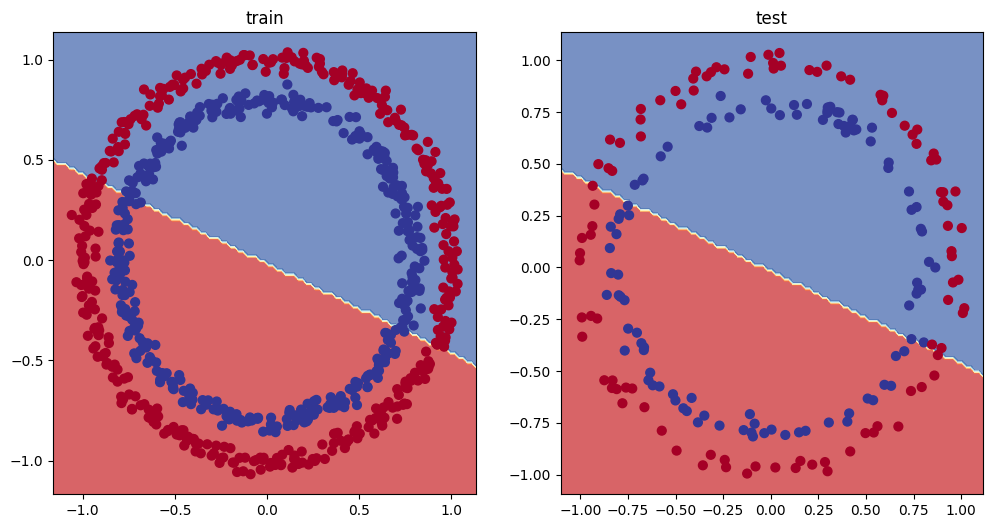

In [ ]:
# Plot decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_0, X_test, y_test)

## Improving a model (from a model prespecctive)

* add more layers
* add more hidden units
* fit for longer
* changing the activation functions
* change the learning rate
* change the loss function

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

In [ ]:
model_1 = CircleModelV1()
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
torch.manual_seed(42)

# Writing training loop
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()

  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | ACC: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69396 | Acc: 50.88% | Test Loss: 0.69261 | ACC: 51.00%
Epoch: 100 | Loss: 0.69305 | Acc: 50.38% | Test Loss: 0.69379 | ACC: 48.00%
Epoch: 200 | Loss: 0.69299 | Acc: 51.12% | Test Loss: 0.69437 | ACC: 46.00%
Epoch: 300 | Loss: 0.69298 | Acc: 51.62% | Test Loss: 0.69458 | ACC: 45.00%
Epoch: 400 | Loss: 0.69298 | Acc: 51.12% | Test Loss: 0.69465 | ACC: 46.00%
Epoch: 500 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69467 | ACC: 46.00%
Epoch: 600 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | ACC: 46.00%
Epoch: 700 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | ACC: 46.00%
Epoch: 800 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | ACC: 46.00%
Epoch: 900 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | ACC: 46.00%


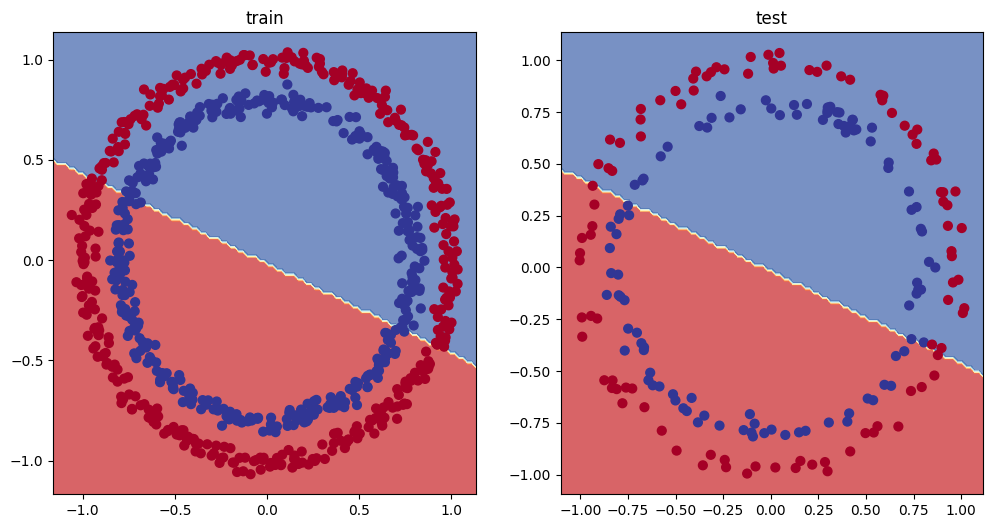

In [ ]:
# Plot decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_1, X_test, y_test)

### Prepareing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out smaller problem

In [ ]:
# Create some data
w = 0.7
b = 0.3
start = 0
end = 1
step = 0.01

# create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = w * X_regression + b

# check data
print(len(X_regression))
X_regression[:10], y_regression[:10]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [ ]:
# Create a train and test split
train_split = int(0.8 * len(X_regression))
X_train, y_train = X_regression[:train_split], y_regression[:train_split]
X_test, y_test = X_regression[train_split:], y_regression[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

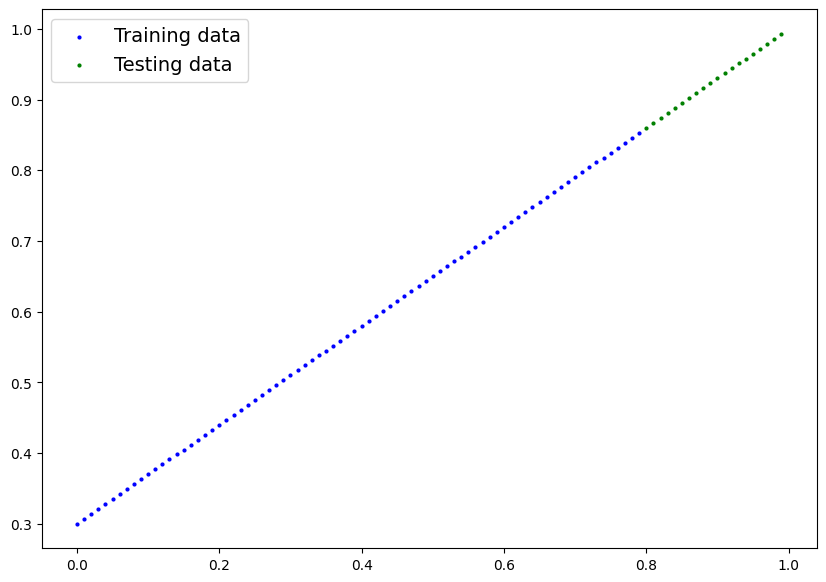

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test
                 )

In [ ]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [ ]:
# Training loop
torch.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  model_2.train()

  y_pred = model_2(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_2.eval()

  with torch.inference_mode():
    test_pred = model_2(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test Loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test Loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test Loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test Loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test Loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test Loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test Loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test Loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test Loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test Loss: 0.00360


In [ ]:
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test)

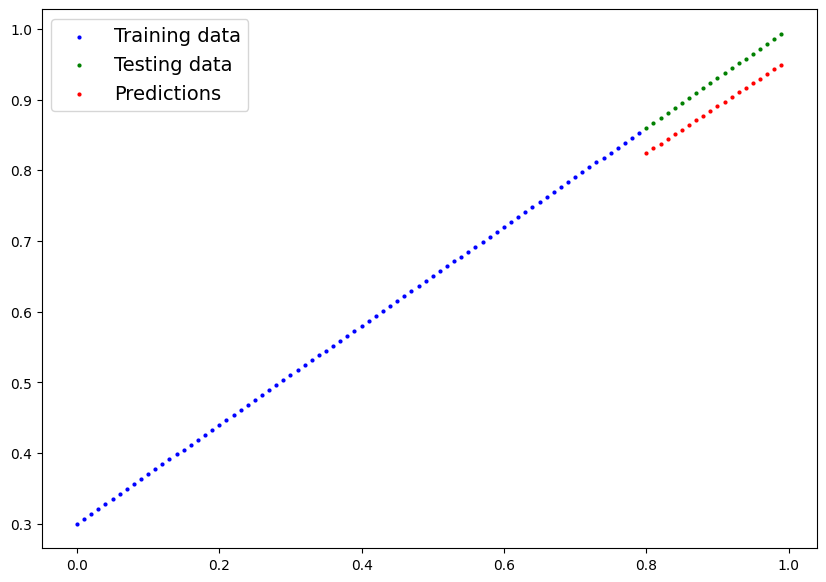

In [ ]:
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_preds
)

### The missing piece : non-linearity

### Recreating non-linear data

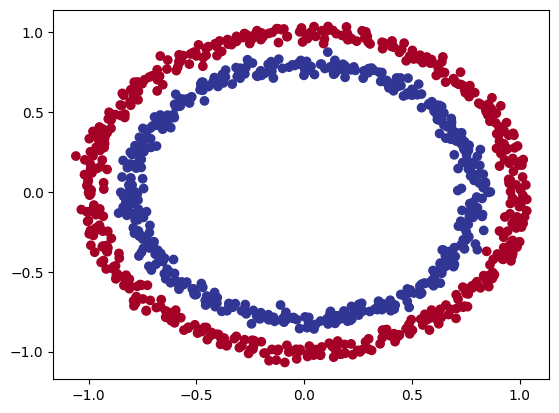

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# data to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# split the data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### Building the model with non-linearity

In [ ]:
# Build a model
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2()
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# loss and optimizers
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

In [ ]:
# training loop
torch.manual_seed(42)

epochs = 2000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  model_3.train()
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295 | Acc: 50.00% | Test Loss: 0.69319 | Test Acc: 50.00%
Epoch: 100 | Loss: 0.69115 | Acc: 52.88% | Test Loss: 0.69102 | Test Acc: 52.50%
Epoch: 200 | Loss: 0.68977 | Acc: 53.37% | Test Loss: 0.68940 | Test Acc: 55.00%
Epoch: 300 | Loss: 0.68795 | Acc: 53.00% | Test Loss: 0.68723 | Test Acc: 56.00%
Epoch: 400 | Loss: 0.68517 | Acc: 52.75% | Test Loss: 0.68411 | Test Acc: 56.50%
Epoch: 500 | Loss: 0.68102 | Acc: 52.75% | Test Loss: 0.67941 | Test Acc: 56.50%
Epoch: 600 | Loss: 0.67515 | Acc: 54.50% | Test Loss: 0.67285 | Test Acc: 56.00%
Epoch: 700 | Loss: 0.66659 | Acc: 58.38% | Test Loss: 0.66322 | Test Acc: 59.00%
Epoch: 800 | Loss: 0.65160 | Acc: 64.00% | Test Loss: 0.64757 | Test Acc: 67.50%
Epoch: 900 | Loss: 0.62362 | Acc: 74.00% | Test Loss: 0.62145 | Test Acc: 79.00%
Epoch: 1000 | Loss: 0.56818 | Acc: 87.75% | Test Loss: 0.57378 | Test Acc: 86.50%
Epoch: 1100 | Loss: 0.48153 | Acc: 93.50% | Test Loss: 0.49935 | Test Acc: 90.50%
Epoch: 1200 | Loss: 0.37056 

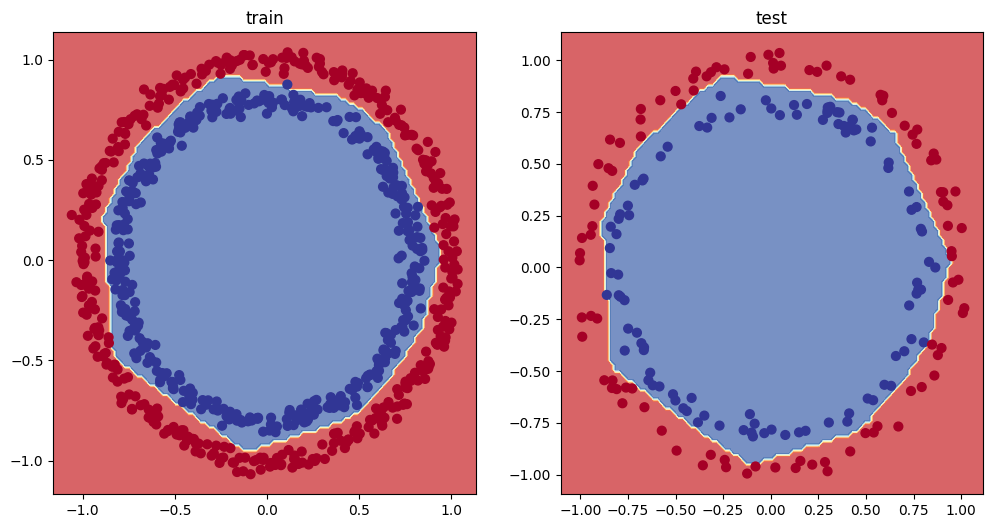

In [ ]:
# Plot decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_3, X_test, y_test)

## Replicating non-linear activation functions

In [ ]:
# create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A, A.dtype

(tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
           2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]),
 torch.float32)

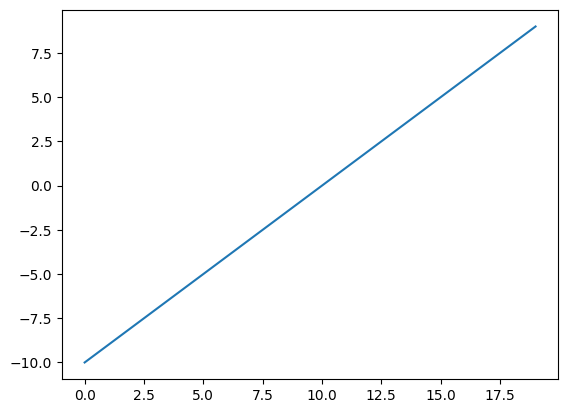

In [ ]:
# Visualize the data
plt.plot(A)

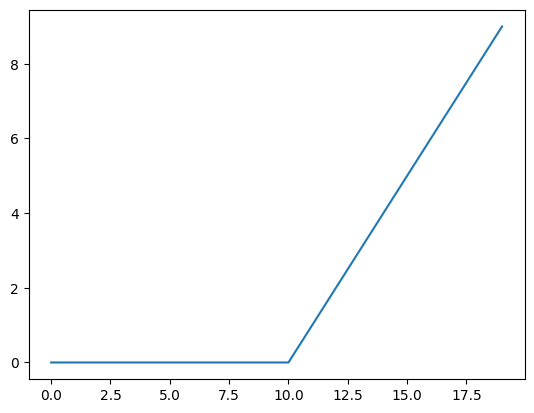

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x):
  return torch.max(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

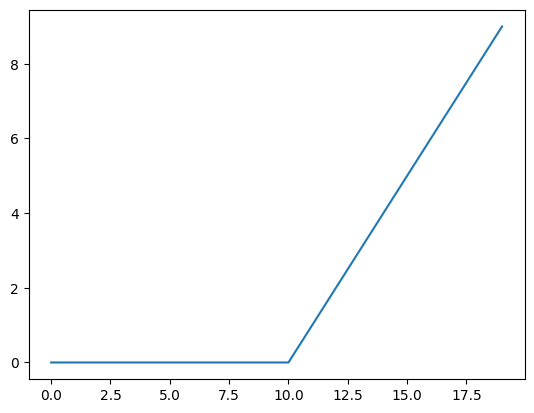

In [ ]:
plt.plot(relu(A))

In [ ]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

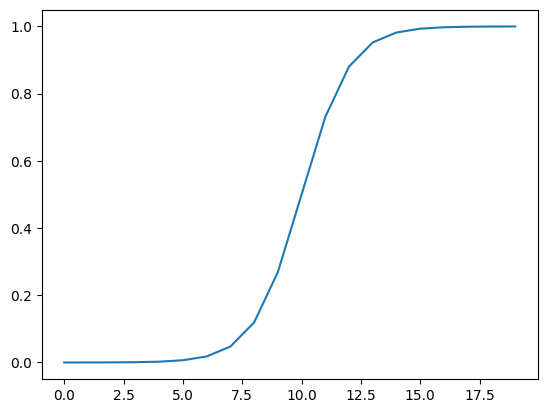

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

# Putting all it together with a multi-class classification problem

* Binary classification - one or another
* Multi-class classification - more than one or another


### creating a toy multi-class dataset

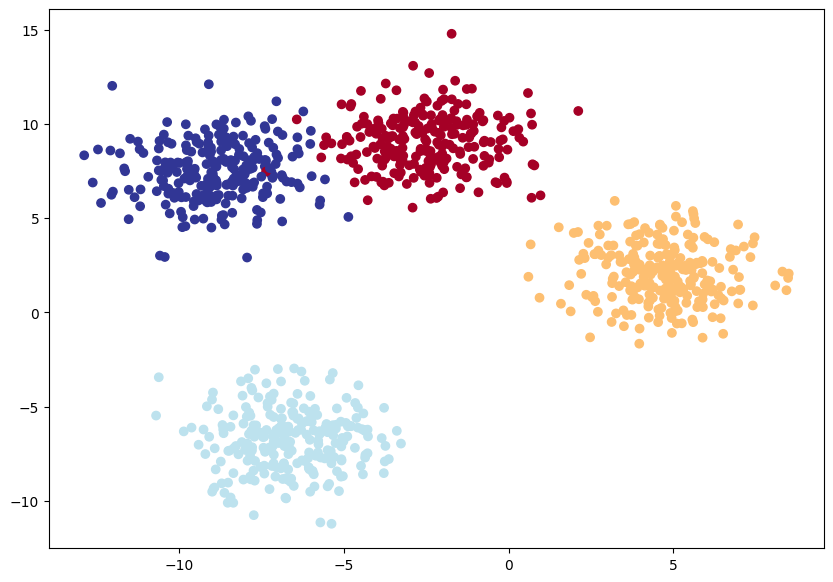

In [ ]:
# Import dependence
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# set hyper parameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# create multi-class data
X_blob, y_blob = make_blobs(
    n_samples=1000,
    n_features=NUM_FEATURES,
    centers=NUM_CLASSES,
    cluster_std=1.5,
    random_state=RANDOM_SEED
)

# turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

### Build Model for multi-class classification



In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """ Initializes multi-class classification model

    Args:
      input_features (int): number of input features
      output_features (int): number of output features
      hidden_units (int): number of hidden units, defaults to 8
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)


model_4 = BlobModel(input_features=2, output_features=4, hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
X_train.shape, y_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [ ]:
torch.unique(y_train)

tensor([0, 1, 2, 3])

### create loss and optimizer

https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

In [ ]:
# Loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

### Getting prediction probabiliies for a multi class Pytorch model

Logits -> pred probab -> pred labels

In [ ]:
# predicting
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_test.to(device))
y_logits[:5]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1, 3, 2, 1, 0])

In [ ]:
# logits -> pred probabs
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:5]

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')

In [ ]:
# pred probab -> pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:5]

tensor([1, 0, 0, 0, 0], device='cuda:0')

In [ ]:
torch.argmax(y_pred_probs[0])

tensor(1, device='cuda:0')

In [ ]:
# def softmax(x):
#   return torch.exp(x) / torch.sum(torch.exp(x), dim=1).unsqueeze(dim=1)

### training and testing loop

In [ ]:
# Training loop
torch.manual_seed(42)

epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  # Train
  model_4.train()

  # Forward pass
  y_logits = model_4(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # Loss
  loss = loss_fn(y_logits, y_train)

  #
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # gradient descent
  optimizer.step()

  # testing
  model_4.eval()

  with torch.inference_mode():

    # forward pass
    test_logits = model_4(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    # loss
    test_loss = loss_fn(test_logits, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 1.15883 | Test Loss: 1.07554
Epoch: 10 | Loss: 0.64476 | Test Loss: 0.66069
Epoch: 20 | Loss: 0.42535 | Test Loss: 0.43074
Epoch: 30 | Loss: 0.25294 | Test Loss: 0.24508
Epoch: 40 | Loss: 0.11232 | Test Loss: 0.10229
Epoch: 50 | Loss: 0.06627 | Test Loss: 0.05848
Epoch: 60 | Loss: 0.05068 | Test Loss: 0.04293
Epoch: 70 | Loss: 0.04300 | Test Loss: 0.03491
Epoch: 80 | Loss: 0.03836 | Test Loss: 0.02988
Epoch: 90 | Loss: 0.03525 | Test Loss: 0.02663


In [ ]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_test)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
y_pred[:5], y_test[:5]

(tensor([1, 3, 2, 1, 0], device='cuda:0'),
 tensor([1, 3, 2, 1, 0], device='cuda:0'))

In [ ]:
from urllib import request
import requests
from pathlib import Path

# Download helper function from learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

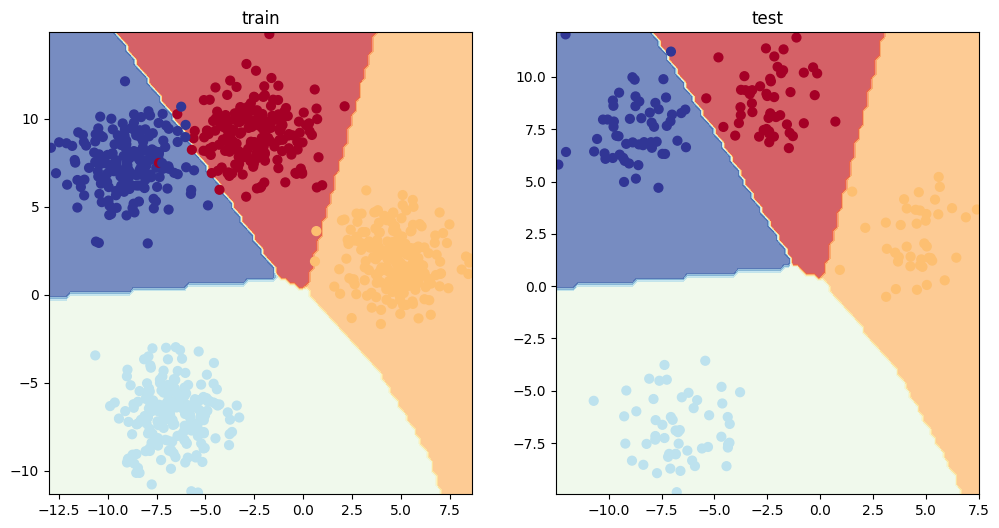

In [ ]:
# Visualize
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_4, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_4, X_test, y_test)

### A few more classification metrics... (a evaluate our classification model)

* Accuracy
* Precision
* F1-score
* Confusion matrix
* Classification report